In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [2]:
Data=pd.read_csv(r"C:\Users\vakada amrutha\Desktop\Traffictelligence\traffic_volume.csv")

In [3]:
Data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
Data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [6]:
Data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [7]:
Data['temp'].fillna(Data['temp'].mean(),inplace=True)
Data['rain'].fillna(Data['rain'].mean(),inplace=True)
Data['snow'].fillna(Data['snow'].mean(),inplace=True)

C:\Users\vakada amrutha\AppData\Local\Temp\ipykernel_16416\2400461802.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['temp'].fillna(Data['temp'].mean(),inplace=True)
C:\Users\vakada amrutha\AppData\Local\Temp\ipykernel_16416\2400461802.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [8]:
from collections import Counter

In [9]:
print(Counter(Data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [10]:
Data['weather'].fillna('clouds',inplace=True)

C:\Users\vakada amrutha\AppData\Local\Temp\ipykernel_16416\1728778773.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['weather'].fillna('clouds',inplace=True)


In [11]:
Data.isnull().sum()

holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
Data['weather'].value_counts()

weather
Clouds          15144
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
clouds             49
Smoke              20
Squall              4
Name: count, dtype: int64

In [15]:
Data['weather']=le.fit_transform(Data['weather'])

In [16]:
Data['holiday']=le.fit_transform(Data['holiday'])

In [17]:
import matplotlib.pyplot as plt

In [18]:
correlation = Data.select_dtypes(include=['number']).corr()
print(correlation)


                 holiday      temp      rain      snow   weather  \
holiday         1.000000  0.004646  0.000177  0.000863 -0.001727   
temp            0.004646  1.000000  0.009070 -0.019758 -0.032292   
rain            0.000177  0.009070  1.000000 -0.000090  0.009473   
snow            0.000863 -0.019758 -0.000090  1.000000  0.036400   
weather        -0.001727 -0.032292  0.009473  0.036400  1.000000   
traffic_volume  0.038057  0.130034  0.004714  0.000735 -0.039910   

                traffic_volume  
holiday               0.038057  
temp                  0.130034  
rain                  0.004714  
snow                  0.000735  
weather              -0.039910  
traffic_volume        1.000000  


<Axes: >

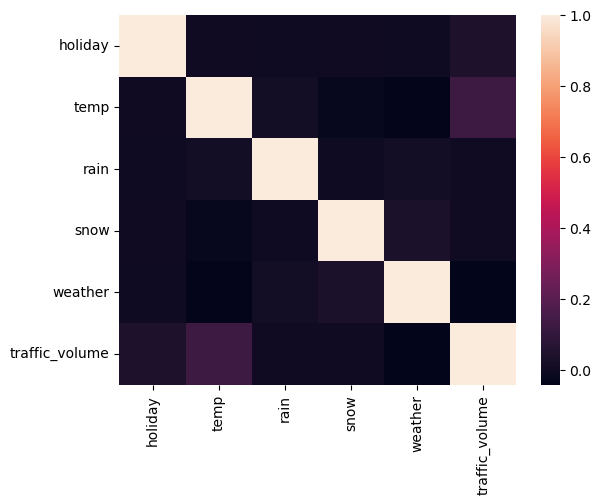

In [19]:
sns.heatmap(correlation)

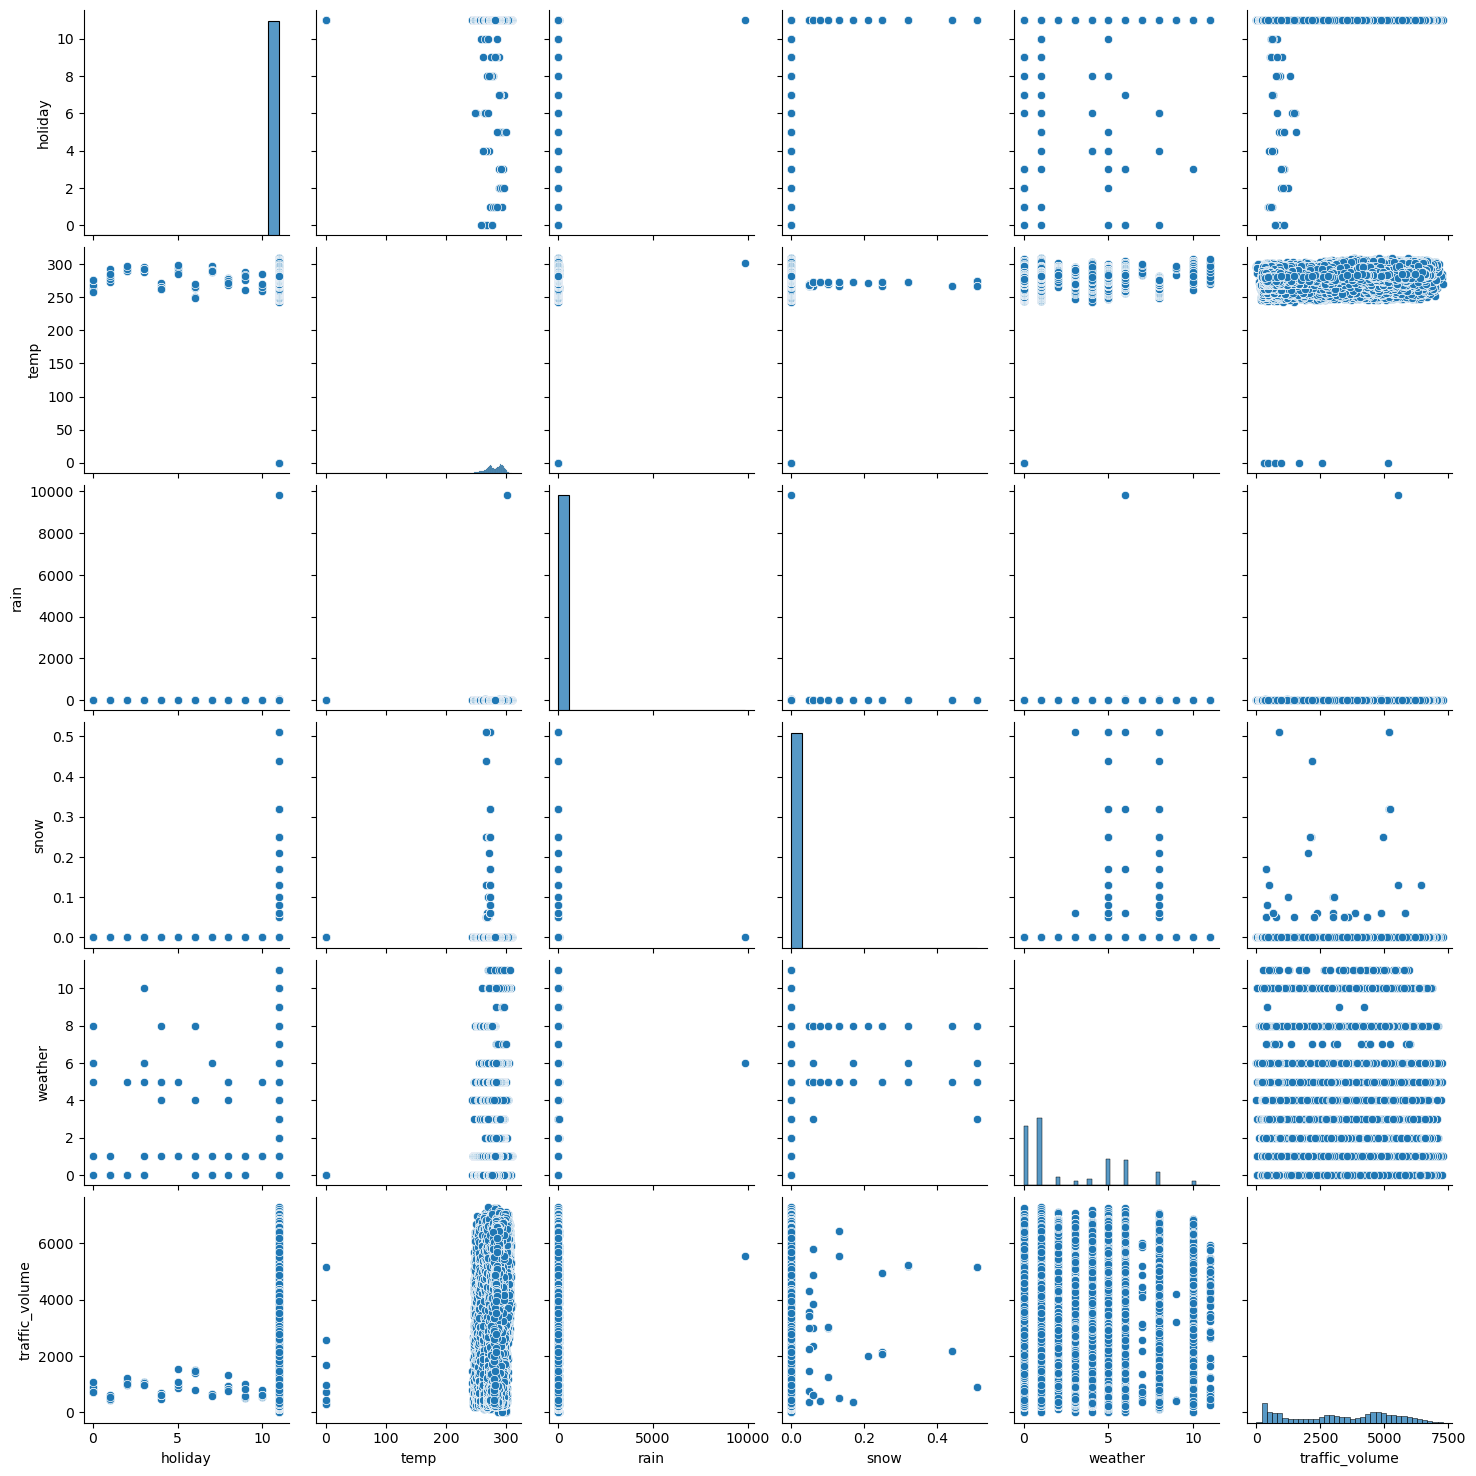

In [20]:
sns.pairplot(Data)

<Axes: >

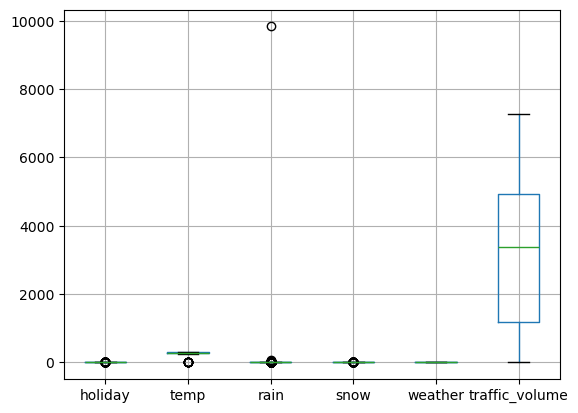

In [21]:
Data.boxplot()

In [22]:
Data[["day","month","year"]] = Data["date"].str.split("-",expand=True)

In [23]:
Data[["hours","minutes","seconds"]] = Data["Time"].str.split(":",expand=True)

In [24]:
Data.drop(columns=['date','Time'],axis=1,inplace=True)

In [25]:
Data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,11,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [26]:
y=Data['traffic_volume']
X=Data.drop(columns=['traffic_volume'],axis=1)

In [27]:
names=X.columns

In [28]:
from sklearn.preprocessing import scale

In [ ]:
caX=sle(X)

In [30]:
X=pd.DataFrame(X,columns=names)

In [31]:
X.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [35]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()


In [36]:
lin_reg.fit(X_train,y_train)
Dtree.fit(X_train,y_train)
Rand.fit(X_train,y_train)
svr.fit(X_train,y_train)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
p1=lin_reg.predict(X_train)
p2=Dtree.predict(X_train)
p3=Rand.predict(X_train)
p4=svr.predict(X_train)
p5=XGB.predict(X_train)

In [38]:
from sklearn import metrics

In [39]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.501465341359022
1.0
0.9748405041227549
-12.207082479491708
0.8484996557235718


In [40]:
p1=lin_reg.predict(X_test)
p2=Dtree.predict(X_test)
p3=Rand.predict(X_test)
p4=svr.predict(X_test)
p5=XGB.predict(X_test)

In [41]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.365880084970492
0.6972692069667399
0.8032224259884193
-11.986624908714628
0.8092036247253418


In [42]:
MSE= metrics.mean_squared_error(p3,y_test)

In [43]:
np.sqrt(MSE)

798.2246881071812

In [44]:
import pickle

In [45]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))

In [46]:
Data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,11,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00
